# installations

In [1]:
#!pip install george

In [2]:
#!pip install astropy==4.2

# imports

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# FBB move this cell at the top. All inmports should be at the beginning of your code/notebook
import pandas as pd
import numpy as np
import os
import yaml
import sys
#import importlib

In [5]:
#cd /content/drive/Shareddrives/FASTlab/reSCONE


In [6]:
os.getcwd()

'/Users/fbb/reSCONE'

In [7]:
sys.path.insert(0, os.getcwd())

In [8]:
sys.path

['/Users/fbb/reSCONE',
 '/Users/fbb/reSCONE',
 '/Users/fbb/reSCONE',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Users/fbb/Library/Python/3.9/lib/python/site-packages',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/local/opt/python-tk@3.9/libexec']

In [9]:
sys.path.append('scone')
sys.path.append('scone/create_heatmaps')

In [10]:
sys.path

['/Users/fbb/reSCONE',
 '/Users/fbb/reSCONE',
 '/Users/fbb/reSCONE',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/usr/local/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/Users/fbb/Library/Python/3.9/lib/python/site-packages',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/local/opt/python-tk@3.9/libexec',
 'scone',
 'scone/create_heatmaps']

In [11]:
#from create_heatmaps.heatmaps_types \
#import CreateHeatmapsFull, CreateHeatmapsEarlyMixed, CreateHeatmapsEarly, MagById, SaveFirstDetectionToCSV
# FBB same: move to the top
import create_heatmaps.heatmaps_types as chf

# configurations

In [12]:
import yaml

with open("scone/config/config_test.yml", "r") as stream:
  try:
    config = yaml.safe_load(stream)
    #print(config)
  except yaml.YAMLError as exc:
    print(exc)

#config

In [13]:
test= {'vii', 'eeee'}

In [14]:
config


{'Ia_fraction': None,
 'batch_size': 32,
 'categorical': False,
 'categorical_max_per_type': 2000,
 'categorical_min_per_type': 200,
 'class_balanced': True,
 'from_json': False,
 'has_ids': True,
 'heatmaps_path': 'output_dir',
 'ids_path': 'scone/output_dir/0_5_Ia_split_heatmaps_ids.hdf5',
 'lcdata_paths': ['input/plasticc_train_lightcurves_000.csv',
  'input/plasticc_train_lightcurves_001.csv',
  'input/plasticc_train_lightcurves_002.csv',
  'input/plasticc_train_lightcurves_003.csv',
  'input/plasticc_train_lightcurves_004.csv',
  'input/plasticc_train_lightcurves_005.csv',
  'input/plasticc_train_lightcurves_006.csv',
  'input/plasticc_train_lightcurves_007.csv',
  'input/plasticc_train_lightcurves_008.csv',
  'input/plasticc_train_lightcurves_009.csv',
  'input/plasticc_train_lightcurves_010.csv',
  'input/plasticc_train_lightcurves_011.csv',
  'input/plasticc_train_lightcurves_012.csv',
  'input/plasticc_train_lightcurves_013.csv',
  'input/plasticc_train_lightcurves_014.csv',
 

In [15]:
# FBB removed cause now the definitions are updated in the config by the split_data code and data_cuts code
#config['lcdata_paths'] = #["input/plasticc_train_lightcurves_{}.csv".format(i) for i in range(100)]
  #["plasticc_train_lightcurves_000.csv", " "]
#config['metadata_paths'] = #["input/plasticc_train_metadata_{}.csv".format(i) for i in range(100)]
  #["plasticc_train_metadata_000.csv", " "]
#config['lcdata_paths'] = ['TEST00_PHOT.fits', " "]
#config['metadata_paths'] = ['TEST00_HEAD.fits', " "]
config['types'] = list(config['sn_type_id_to_name'].keys())
config

{'Ia_fraction': None,
 'batch_size': 32,
 'categorical': False,
 'categorical_max_per_type': 2000,
 'categorical_min_per_type': 200,
 'class_balanced': True,
 'from_json': False,
 'has_ids': True,
 'heatmaps_path': 'output_dir',
 'ids_path': 'scone/output_dir/0_5_Ia_split_heatmaps_ids.hdf5',
 'lcdata_paths': ['input/plasticc_train_lightcurves_000.csv',
  'input/plasticc_train_lightcurves_001.csv',
  'input/plasticc_train_lightcurves_002.csv',
  'input/plasticc_train_lightcurves_003.csv',
  'input/plasticc_train_lightcurves_004.csv',
  'input/plasticc_train_lightcurves_005.csv',
  'input/plasticc_train_lightcurves_006.csv',
  'input/plasticc_train_lightcurves_007.csv',
  'input/plasticc_train_lightcurves_008.csv',
  'input/plasticc_train_lightcurves_009.csv',
  'input/plasticc_train_lightcurves_010.csv',
  'input/plasticc_train_lightcurves_011.csv',
  'input/plasticc_train_lightcurves_012.csv',
  'input/plasticc_train_lightcurves_013.csv',
  'input/plasticc_train_lightcurves_014.csv',
 

In [16]:
testing = config["lcdata_paths"][0]
testing

'input/plasticc_train_lightcurves_000.csv'

In [17]:
#from astropy.table import Table
#Table.read('TEST00_PHOT.fits')

# creating heatmaps

Processing file: input/plasticc_train_lightcurves_000.csv
example id b'SNII_730'
job 0: found ids, expect 9/10 heatmaps for this file
writing to output_dir
output_dir/heatmaps_0.tfrecord 730
job 0: processing 0 of 9


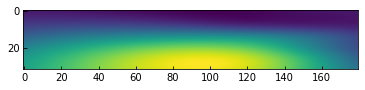

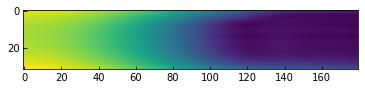

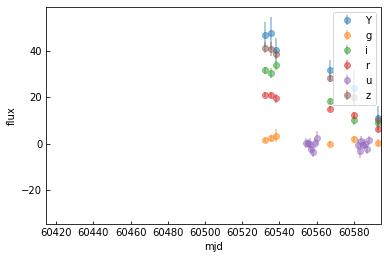

2022-07-21 14:59:43.472831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


output_dir/heatmaps_0.tfrecord 745


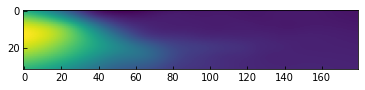

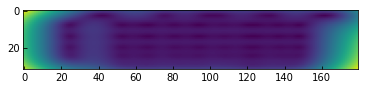

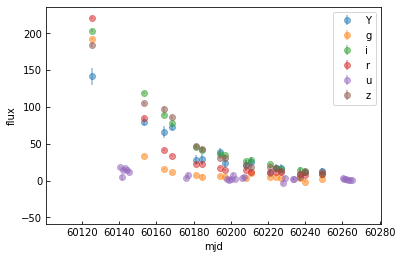

output_dir/heatmaps_0.tfrecord 1124


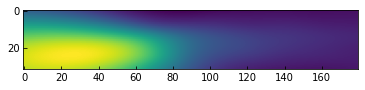

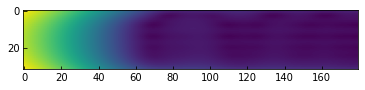

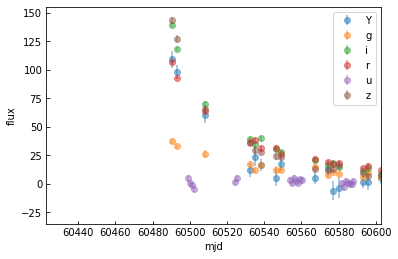

output_dir/heatmaps_0.tfrecord 1632


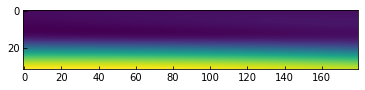

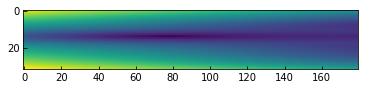

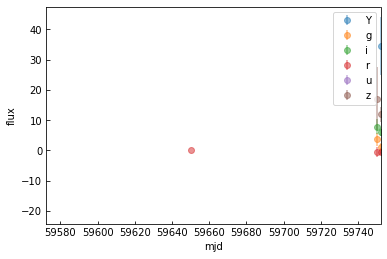

output_dir/heatmaps_0.tfrecord 1920


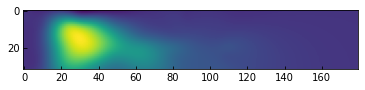

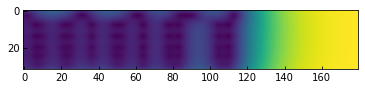

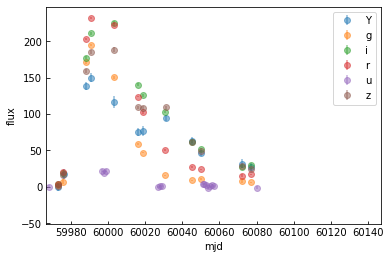

output_dir/heatmaps_0.tfrecord 2072


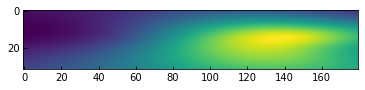

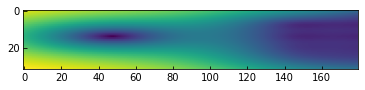

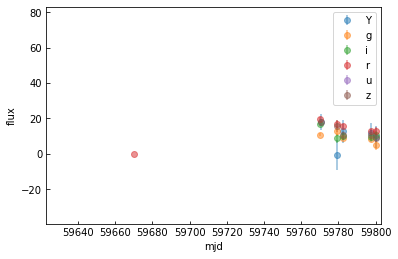

output_dir/heatmaps_0.tfrecord 2103


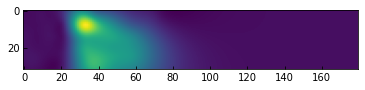

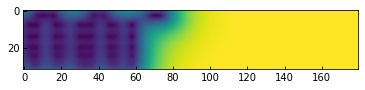

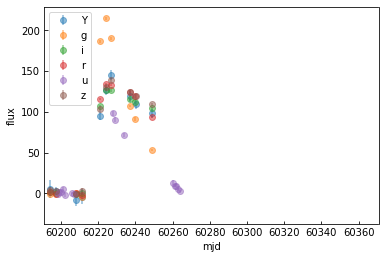

output_dir/heatmaps_0.tfrecord 2300


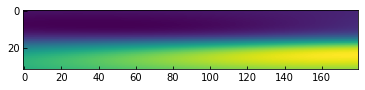

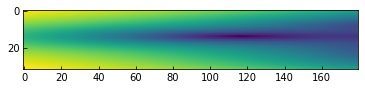

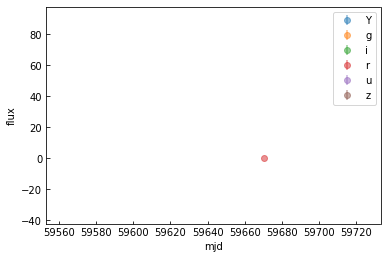

output_dir/heatmaps_0.tfrecord 2330


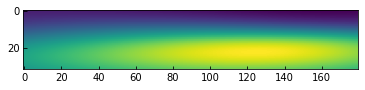

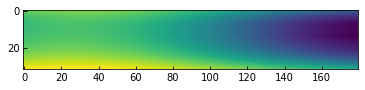

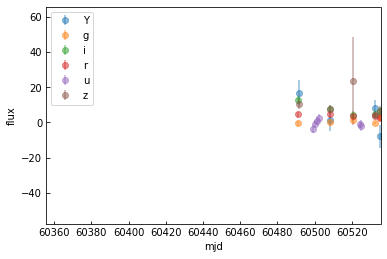

/Users/fbb/reSCONE/scone/create_heatmaps/base.py:174: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  finished_filenames.append({"filenames": os.path.basename(self.metadata_path)}, ignore_index=True).to_csv(self.finished_filenames_path, index=False)


In [18]:
#importlib.reload(chf)
for i in range(len(config['lcdata_paths'])):
  create_heatmaps_object = chf.CreateHeatmapsFull(config, i)
  #create_heatmaps_object.lcdata_path
  create_heatmaps_object.run()
  break